In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print("###### Graph Init ######")               
G= nx.Graph()                                   # 방향성이 없는 그래프
DiGraph = nx.DiGraph()                          # 방향성이 있는 그래프

###### Graph Init ######


In [6]:
print("###### Add Node to Graph ######")                    
print("# Add node 1")                                      
G.add_node(1)                                               # 정점 1 추가
print("Num of nodes in G : " + str(G.number_of_nodes()))    # 정점의 수 반환
print("Graph : " + str(G.nodes)+ "\n")                      # 정점의 목록 반환

###### Add Node to Graph ######
# Add node 1
Num of nodes in G : 1
Graph : [1]



In [8]:
print("# Add vertex 2 ~ 10")                                # 정점 2 ~ 10 추가
for i in range (1, 11):
    G.add_node(i)
print("Num of nodes in G : " + str(G.number_of_nodes()))
print("Graph : " + str(G.nodes) + "\n")


print("###### Add Edge to Graph ######")                    
G = nx.Graph()
print("#Add edge (1, 2)")                                   
G.add_edge(1, 2)                                            # 정점 1과 2 사이에 간선 추가
print("Graph : " + str(G.edges) + "\n")                     # 간선의 목록 반환


# Add vertex 2 ~ 10
Num of nodes in G : 10
Graph : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

###### Add Edge to Graph ######
#Add edge (1, 2)
Graph : [(1, 2)]



In [9]:
print("#Add edge (1, i) for i = 2 ~ 10")                    # 정점 1과 다른 정점 사이의 간선 추가
for i in range (2, 11):
    G.add_edge(1, i)
print("Graph : " + str(G.edges) + "\n")

#Add edge (1, i) for i = 2 ~ 10
Graph : [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]



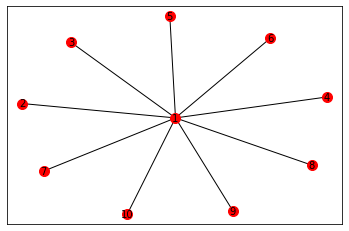

In [10]:
# 그래프를 시각화
# 정점의 위치 결정
pos = nx.spring_layout(G) # 시각화를 위해선 위치를 잘 저장하는 것이중요하다.                                            
# 정점의 색과 크기를 지정하여 출력
im = nx.draw_networkx_nodes(G, pos, node_color="red", node_size=100)    
# 간선 출력
nx.draw_networkx_edges(G, pos)                                          
# 각 정점의 라벨을 출력
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")       
plt.show()



<br></br><br></br><br></br><br></br><br></br>

__간선 List ( Egde_List )__  

각 정점간의 간선을 나타냄, 두 정점간의 순서쌍 형태로 저장  
방향성이 있는경우 (start, end) 로 정의  
____

단순하게 표현 할 수 있지만, 비효율적인 경우가 있다.

__인접 List( Adjacent list )__  

각 정점의 이웃들을 저장
python dictionary 형태로 저장한다.  
정점에 따른 이웃들을 리스트 형태로 저장 할 수 있다.  

방향성이 있는경우 이러한 데이터 형태를 2개 뽑아서 나타낸다.

---- 

효율적인 처리가 가능하다.


__인접 Matrix ( Adjacency Matrix )__  

row, column 의 수가 그래프의 모든 정점의 수와 동일하다.  
대각행렬의 형태를 띈다.  

방향성이 있는경우 동일 매트릭스에 row 기준으로 적용한다.  
ex) 만약 1-->2 이고 2-->1이 아닌경우  


---

파일의 저장경우 희소행렬을 활용해서 저장을 한다.  
but 0이 아닌경우가 많은 경우 오히려 희소행렬의 효율이 떨어진다.

<br></br><br></br><br></br><br></br><br></br>


**Lab 2 : Graph Property**
- Instuctor : Kijung Shin
- Teaching Assistants : Deukryeol Yoon(main), Hyunju Lee, Shinhwan Kang 
- 본 실습에서는 그래프의 다양한 특성 중 그래프 지름, 전역 군집 계수, 차수 분포를 배우고, 수업에서 배운 small world graph의 그래프 특성을 알아본다.



In [13]:
# 실습에 필요한 library를 import하고 그래프를 초기화합니다.
import networkx as nx
import os
import os.path as osp
import numpy as np
import sys
import matplotlib.pyplot as plt
import collections
np.set_printoptions(threshold=sys.maxsize)

cycle_graph = nx.Graph()
regular_graph = nx.Graph()
small_world_graph = nx.Graph()
random_graph = nx.Graph()

In [14]:
# 실습에 사용할 데이터를 읽어옵니다.
base_path = "/Users/joons/Downloads"


data = 'data/lab/lab2/cycle.txt'
data = osp.join( base_path , data )
f = open(data)
for line in f:
    v1, v2 = map(int, line.split())
    cycle_graph.add_edge(v1, v2)

data = 'data/lab/lab2/regular.txt'
data = osp.join( base_path , data )
f = open(data)
for line in f:
    v1, v2 = map(int, line.split())
    regular_graph.add_edge(v1, v2)

data = 'data/lab/lab2/small_world.txt'
data = osp.join( base_path , data )
f = open(data)
for line in f:
    v1, v2, = map(int, line.split())
    small_world_graph.add_edge(v1, v2)

data = 'data/lab/lab2/random.txt'
data = osp.join( base_path , data )
f = open(data)
for line in f:
    v1, v2 = map(int, line.split())
    random_graph.add_edge(v1, v2)

In [15]:
# 그래프의 전역 군집 계수를 찾는 함수입니다.
#
# 특정 정점 u의 정점 계수(cc)는 아래와 같이 구할 수 있습니다.
# cc(u) = 2T(u)/(deg(u) * (deg(u) - 1))
#   - cc(u) : 정점 u의 군집계수
#   - T(u)  : 정점 u가 들어있는 삼각형 개수
#   - deg(u): 정점 u의 차수 (degree)
#
# 그리고 전역 군집 계수는 모든 정점의 cc(u)의 평균을 의미합니다.
# 전역 군집 계수
# avg_cc(G) = sigma(u in G) cc(u) / n
#   - avg_cc(G) : 그래프 G의 전역 군집 계수
#   - n         : 그래프 G의 정점 개수
#
def getGraphAverageClusteringCoefficient(Graph):
    ccs = []
    for v in Graph.nodes:
        num_connected_pairs = 0
        for neighbor1 in Graph.neighbors(v):
            for neighbor2 in Graph.neighbors(v):
                if neighbor1 <= neighbor2:
                    continue
                if Graph.has_edge(neighbor1, neighbor2):
                    num_connected_pairs += 1
        cc = num_connected_pairs / ( Graph.degree(v) * (Graph.degree(v) -1) / 2 )
        ccs.append(cc)
    return sum(ccs) / len(ccs)

In [19]:
# 본 실습에서는 그래프의 다양한 특성 중 그래프 지름과 전역 군집 계수를 분석해봅니다.
# 그래프에서 Diameter, Average Clustering Coefficient를 찾는 알고리즘을 구현하고, networkx에서 제공하는 라이브러리와 결과를 비교해봅시다.

# 그래프의 지름을 찾는 함수입니다.
# Definition. Graph Diameter
#   The graph diameter of a graph is the length max(u,v)d(u,v) of the "longest shortest path between any two graph vertices (u,v), where d(u,v) is a graph distance.
#
def getGraphDiameter(Graph):
    diameter = 0
    for v in Graph.nodes:
        max_length = max(nx.single_source_shortest_path_length( Graph, v ).values())
        diameter = diameter if diameter > max_length else max_length
    return diameter

In [20]:
# 아래는 위의 함수로 구한 그래프 지름 및 전역 군집 계수 값과 networkX에서 지원하는 library로 구한 값을 비교해봅니다.
#
#                   |     그래프 지름        |     전역 군집 계수
# ------------------+------------------------------------------------------------                    
# Regular Graph     |         High           |              High
# Small World Graph |         Low            |              High
# Random Graph      |         Low            |              Low
#
print("1. Graph Diameter")
print("cycle graph : " + str(nx.diameter(cycle_graph)))
print("cycle graph : " + str(getGraphDiameter(cycle_graph)))

print("regular graph : " + str(nx.diameter(regular_graph)))
print("regular graph : " + str(getGraphDiameter(regular_graph)))

print("small world graph : " + str(nx.diameter(small_world_graph)))
print("small world graph : " + str(getGraphDiameter(small_world_graph)))

print("random graph : " + str(nx.diameter(random_graph)))
print("random graph : " + str(getGraphDiameter(random_graph)) + "\n")

print("2. Average Clustering Coefficient")
print("cycle graph : " + str(nx.average_clustering(cycle_graph)))
print("cycle graph : " + str(getGraphAverageClusteringCoefficient(cycle_graph)))
print("regular graph : " + str(nx.average_clustering(regular_graph)))
print("regular graph : " + str(getGraphAverageClusteringCoefficient(regular_graph)))

print("small world graph : " + str(nx.average_clustering(small_world_graph)))
print("small world graph : " + str(getGraphAverageClusteringCoefficient(small_world_graph)))


print("random graph : " + str(nx.average_clustering(random_graph)))
print("random graph : " + str(getGraphAverageClusteringCoefficient(random_graph)) + "\n")

1. Graph Diameter
cycle graph : 15
cycle graph : 15
regular graph : 8
regular graph : 8
small world graph : 6
small world graph : 6
random graph : 5
random graph : 5

2. Average Clustering Coefficient
cycle graph : 0.0
cycle graph : 0.0
regular graph : 0.5
regular graph : 0.5
small world graph : 0.42555555555555563
small world graph : 0.42555555555555563
random graph : 0.027777777777777776
random graph : 0.027777777777777776



3. Degree Distribution


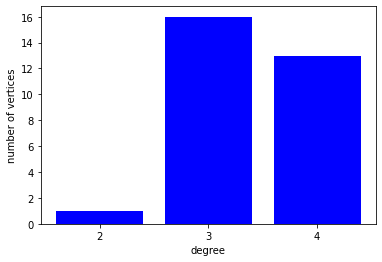

In [21]:
# 그래프의 차수 분포을 그리는 부분입니다.
print("3. Degree Distribution")
degree_sequence = sorted([d for n, d in random_graph.degree()], reverse = True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, color="b")
plt.xlabel('degree')
plt.ylabel('number of vertices')
plt.xticks([2, 3, 4])
plt.show()